<a href="https://colab.research.google.com/github/javierespinozat/Diabetic-Retinopathy-Detection/blob/draft/Diabetic_Retinopathy_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract:
This dataset is a large set of high-resolution retina images taken under a variety of imaging conditions. A left and right field is provided for every subject. Images are labeled with a subject id as well as either left or right (e.g. 1_left.jpeg is the left eye of patient id 1).

A clinician has rated the presence of diabetic retinopathy in each image on a scale of 0 to 4, according to the following scale:

0 - No DR
1 - Mild
2 - Moderate
3 - Severe
4 - Proliferative DR
Total Images: 35126. The distribution of labels is: {0: 25810, 1: 2443, 2: 5292, 4: 708, 3: 873}

Your task is to create an automated analysis system capable of assigning a score based on this scale.

The images in the dataset come from different models and types of cameras, which can affect the visual appearance of left vs. right. Some images are shown as one would see the retina anatomically (macula on the left, optic nerve on the right for the right eye). Others are shown as one would see through a microscope condensing lens (i.e. inverted, as one sees in a typical live eye exam). There are generally two ways to tell if an image is inverted:

It is inverted if the macula (the small dark central area) is slightly higher than the midline through the optic nerve. If the macula is lower than the midline of the optic nerve, it's not inverted. If there is a notch on the side of the image (square, triangle, or circle) then it's not inverted. If there is no notch, it's inverted.

Like any real-world data set, you will encounter noise in both the images and labels. Images may contain artifacts, be out of focus, underexposed, or overexposed. A major aim of this competition is to develop robust algorithms that can function in the presence of noise and variation.





URL: https://www.kaggle.com/c/diabetic-retinopathy-detection

License: No license specified, the dataset may be protected by copyright.


Source: http://academictorrents.com/details/7208a86910cc518ae8feaa9021bf7f8565b97644

magnet:?xt=urn:btih:7208a86910cc518ae8feaa9021bf7f8565b97644&tr=http%3A%2F%2Facademictorrents.com%2Fannounce.php&tr=udp%3A%2F%2Ftracker.coppersurfer.tk%3A6969&tr=udp%3A%2F%2Ftracker.opentrackr.org%3A1337%2Fannounce&tr=udp%3A%2F%2Ftracker.leechers-paradise.org%3A6969

este es el magnet a los datos:

In [0]:
magnet = 'magnet:?xt=urn:btih:08c244595c6cc4ec403b21023cf99c2b085cbc72&tr=http%3A%2F%2Facademictorrents.com%2Fannounce.php&tr=udp%3A%2F%2Ftracker.coppersurfer.tk%3A6969&tr=udp%3A%2F%2Ftracker.opentrackr.org%3A1337%2Fannounce&tr=udp%3A%2F%2Ftracker.leechers-paradise.org%3A6969'

instalamos un manager para torrents

In [0]:
!apt install python3-libtorrent

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libtorrent-rasterbar9
Suggested packages:
  libtorrent-rasterbar-dbg
The following NEW packages will be installed:
  libtorrent-rasterbar9 python3-libtorrent
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 1,569 kB of archives.
After this operation, 5,718 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtorrent-rasterbar9 amd64 1.1.5-1build1 [1,258 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-libtorrent amd64 1.1.5-1build1 [310 kB]
Fetched 1,569 kB in 1s (1,088 kB/s)
Selecting previously unselected package libtorrent-rasterbar9.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../libtorrent-rasterbar9_1.1.5-1build1_amd64.deb ...
Unpacking libtorrent-rasterbar9 (1.1.5-1build1) ...
Se

descargamos los datos en la máquina de google (aprox 40 min)

In [0]:
import libtorrent as lt
import time
import datetime

ses = lt.session()
ses.listen_on(6881, 6891)
params = {
    'save_path': '/tmp/Chest X-Ray Images (Pneumonia)',
    'storage_mode': lt.storage_mode_t(2),
    'paused': False,
    'auto_managed': True,
    'duplicate_is_error': True}
link = magnet
print(link)

handle = lt.add_magnet_uri(ses, link, params)
ses.start_dht()

begin = time.time()
print(datetime.datetime.now())

print ('Downloading Metadata...')
while (not handle.has_metadata()):
    time.sleep(1)
print ('Got Metadata, Starting Torrent Download...')

print("Starting", handle.name())

while (handle.status().state != lt.torrent_status.seeding):
    s = handle.status()
    state_str = ['queued', 'checking', 'downloading metadata', \
            'downloading', 'finished', 'seeding', 'allocating']
    print ('%.2f%% complete (down: %.1f kb/s up: %.1f kB/s peers: %d) %s ' % \
            (s.progress * 100, s.download_rate / 1000, s.upload_rate / 1000, \
            s.num_peers, state_str[s.state]))
    time.sleep(5)

end = time.time()
print(handle.name(), "COMPLETE")

print("Elapsed Time: ",int((end-begin)//60),"min :", int((end-begin)%60), "sec")

print(datetime.datetime.now())

magnet:?xt=urn:btih:08c244595c6cc4ec403b21023cf99c2b085cbc72&tr=http%3A%2F%2Facademictorrents.com%2Fannounce.php&tr=udp%3A%2F%2Ftracker.coppersurfer.tk%3A6969&tr=udp%3A%2F%2Ftracker.opentrackr.org%3A1337%2Fannounce&tr=udp%3A%2F%2Ftracker.leechers-paradise.org%3A6969
2020-05-20 22:02:36.789954
Got Metadata, Starting Torrent Download...
Starting diabetic-retinopathy-detection
0.00% complete (down: 23.1 kb/s up: 1.2 kB/s peers: 5) downloading 
0.02% complete (down: 1036.1 kb/s up: 33.5 kB/s peers: 5) downloading 
0.05% complete (down: 1910.3 kb/s up: 57.2 kB/s peers: 5) downloading 
0.10% complete (down: 2574.8 kb/s up: 74.5 kB/s peers: 5) downloading 
0.14% complete (down: 2796.9 kb/s up: 80.7 kB/s peers: 5) downloading 
0.19% complete (down: 3275.0 kb/s up: 94.1 kB/s peers: 5) downloading 
0.24% complete (down: 3274.1 kb/s up: 93.2 kB/s peers: 5) downloading 
0.29% complete (down: 3719.6 kb/s up: 106.4 kB/s peers: 5) downloading 
0.35% complete (down: 3826.6 kb/s up: 109.5 kB/s peers: 5

In [7]:
!ls '/tmp/Diabetic Retinopathy Detection/diabetic-retinopathy-detection'

sample.zip  trainLabels.csv.zip  train.zip


In [8]:
%cd '/tmp/Diabetic Retinopathy Detection/diabetic-retinopathy-detection'
!ls

/tmp/Diabetic Retinopathy Detection/diabetic-retinopathy-detection
sample.zip  trainLabels.csv.zip  train.zip


In [9]:
!unzip 'trainLabels.csv.zip'
!ls

Archive:  trainLabels.csv.zip
  inflating: trainLabels.csv         
sample.zip  trainLabels.csv  trainLabels.csv.zip  train.zip


In [10]:
!cat 'trainLabels.csv' | wc -l

35127


In [11]:
!head -10 'trainLabels.csv'

image,level
10_left,0
10_right,0
13_left,0
13_right,0
15_left,1
15_right,2
16_left,4
16_right,4
17_left,0


35126 datos en total (la primera linea es el header)

aparentemente left y right tienen etiquetas distintas

In [0]:
import pandas as pd


In [15]:
labels = pd.read_csv('trainLabels.csv', sep =',')
labels.head()

image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1

se observa que el correlativo en el nombre de la imagen no es unitario

In [23]:
print('unique images: ',labels['image'].unique())
print('unique image labels: ',labels['level'].unique())

unique images:  ['10_left' '10_right' '13_left' ... '44348_right' '44349_left'
 '44349_right']
unique image labels:  [0 1 2 4 3]


In [24]:
print('images len : ',len(labels['image'].unique()))
print('unique image labels: ',labels['level'].unique())

images len :  35126
unique image labels:  [0 1 2 4 3]


se tienen 4 clases. un primer enfoque será tratar las imágenes left y right de las retinas como indistintos. ¿por qué? porque podremos usar data augmentation y hacerles un flip horizontal para modificar la data, de manera que el modelo que definamos pueda aprender a distinguir los rasgos indiferente de si es left o right, y luego checkear los resultados.

In [25]:
!ls

sample.zip  trainLabels.csv  trainLabels.csv.zip  train.zip


In [27]:
!unzip 'sample.zip'

Archive:  sample.zip
   creating: sample/
  inflating: sample/10_left.jpeg     
  inflating: sample/10_right.jpeg    
  inflating: sample/13_left.jpeg     
  inflating: sample/13_right.jpeg    
  inflating: sample/15_left.jpeg     
  inflating: sample/15_right.jpeg    
  inflating: sample/16_left.jpeg     
  inflating: sample/16_right.jpeg    
  inflating: sample/17_left.jpeg     
  inflating: sample/17_right.jpeg    


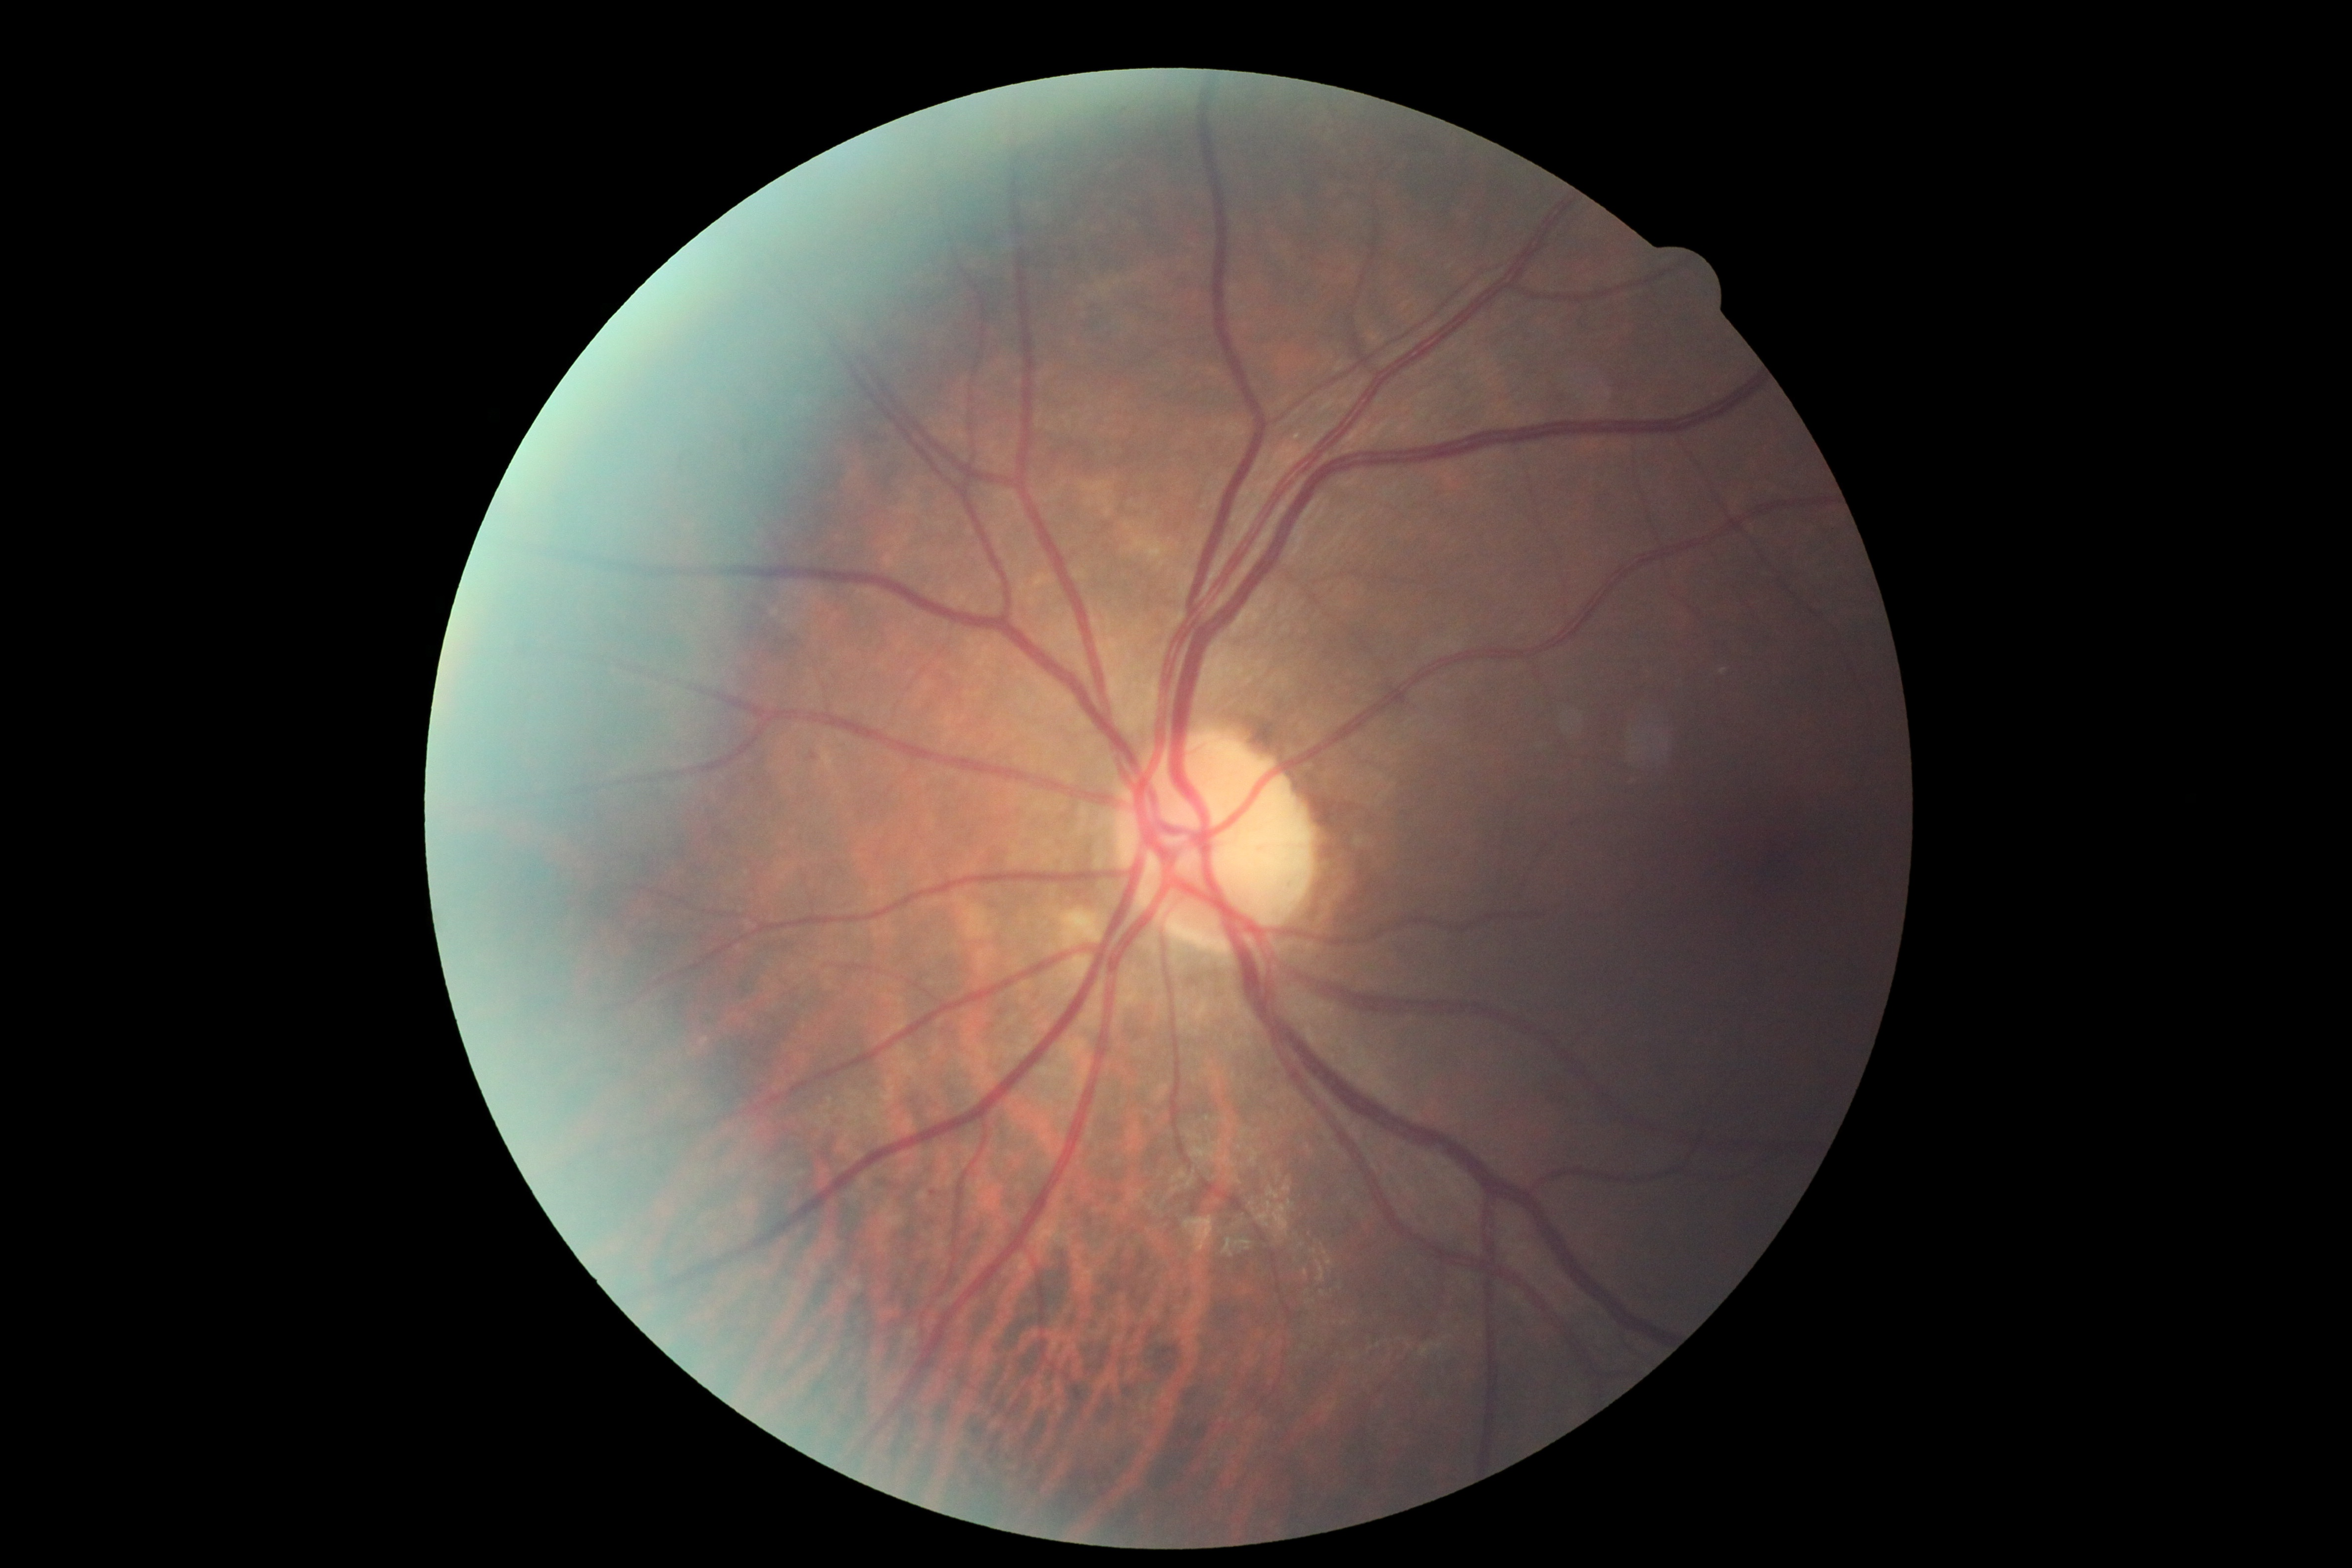

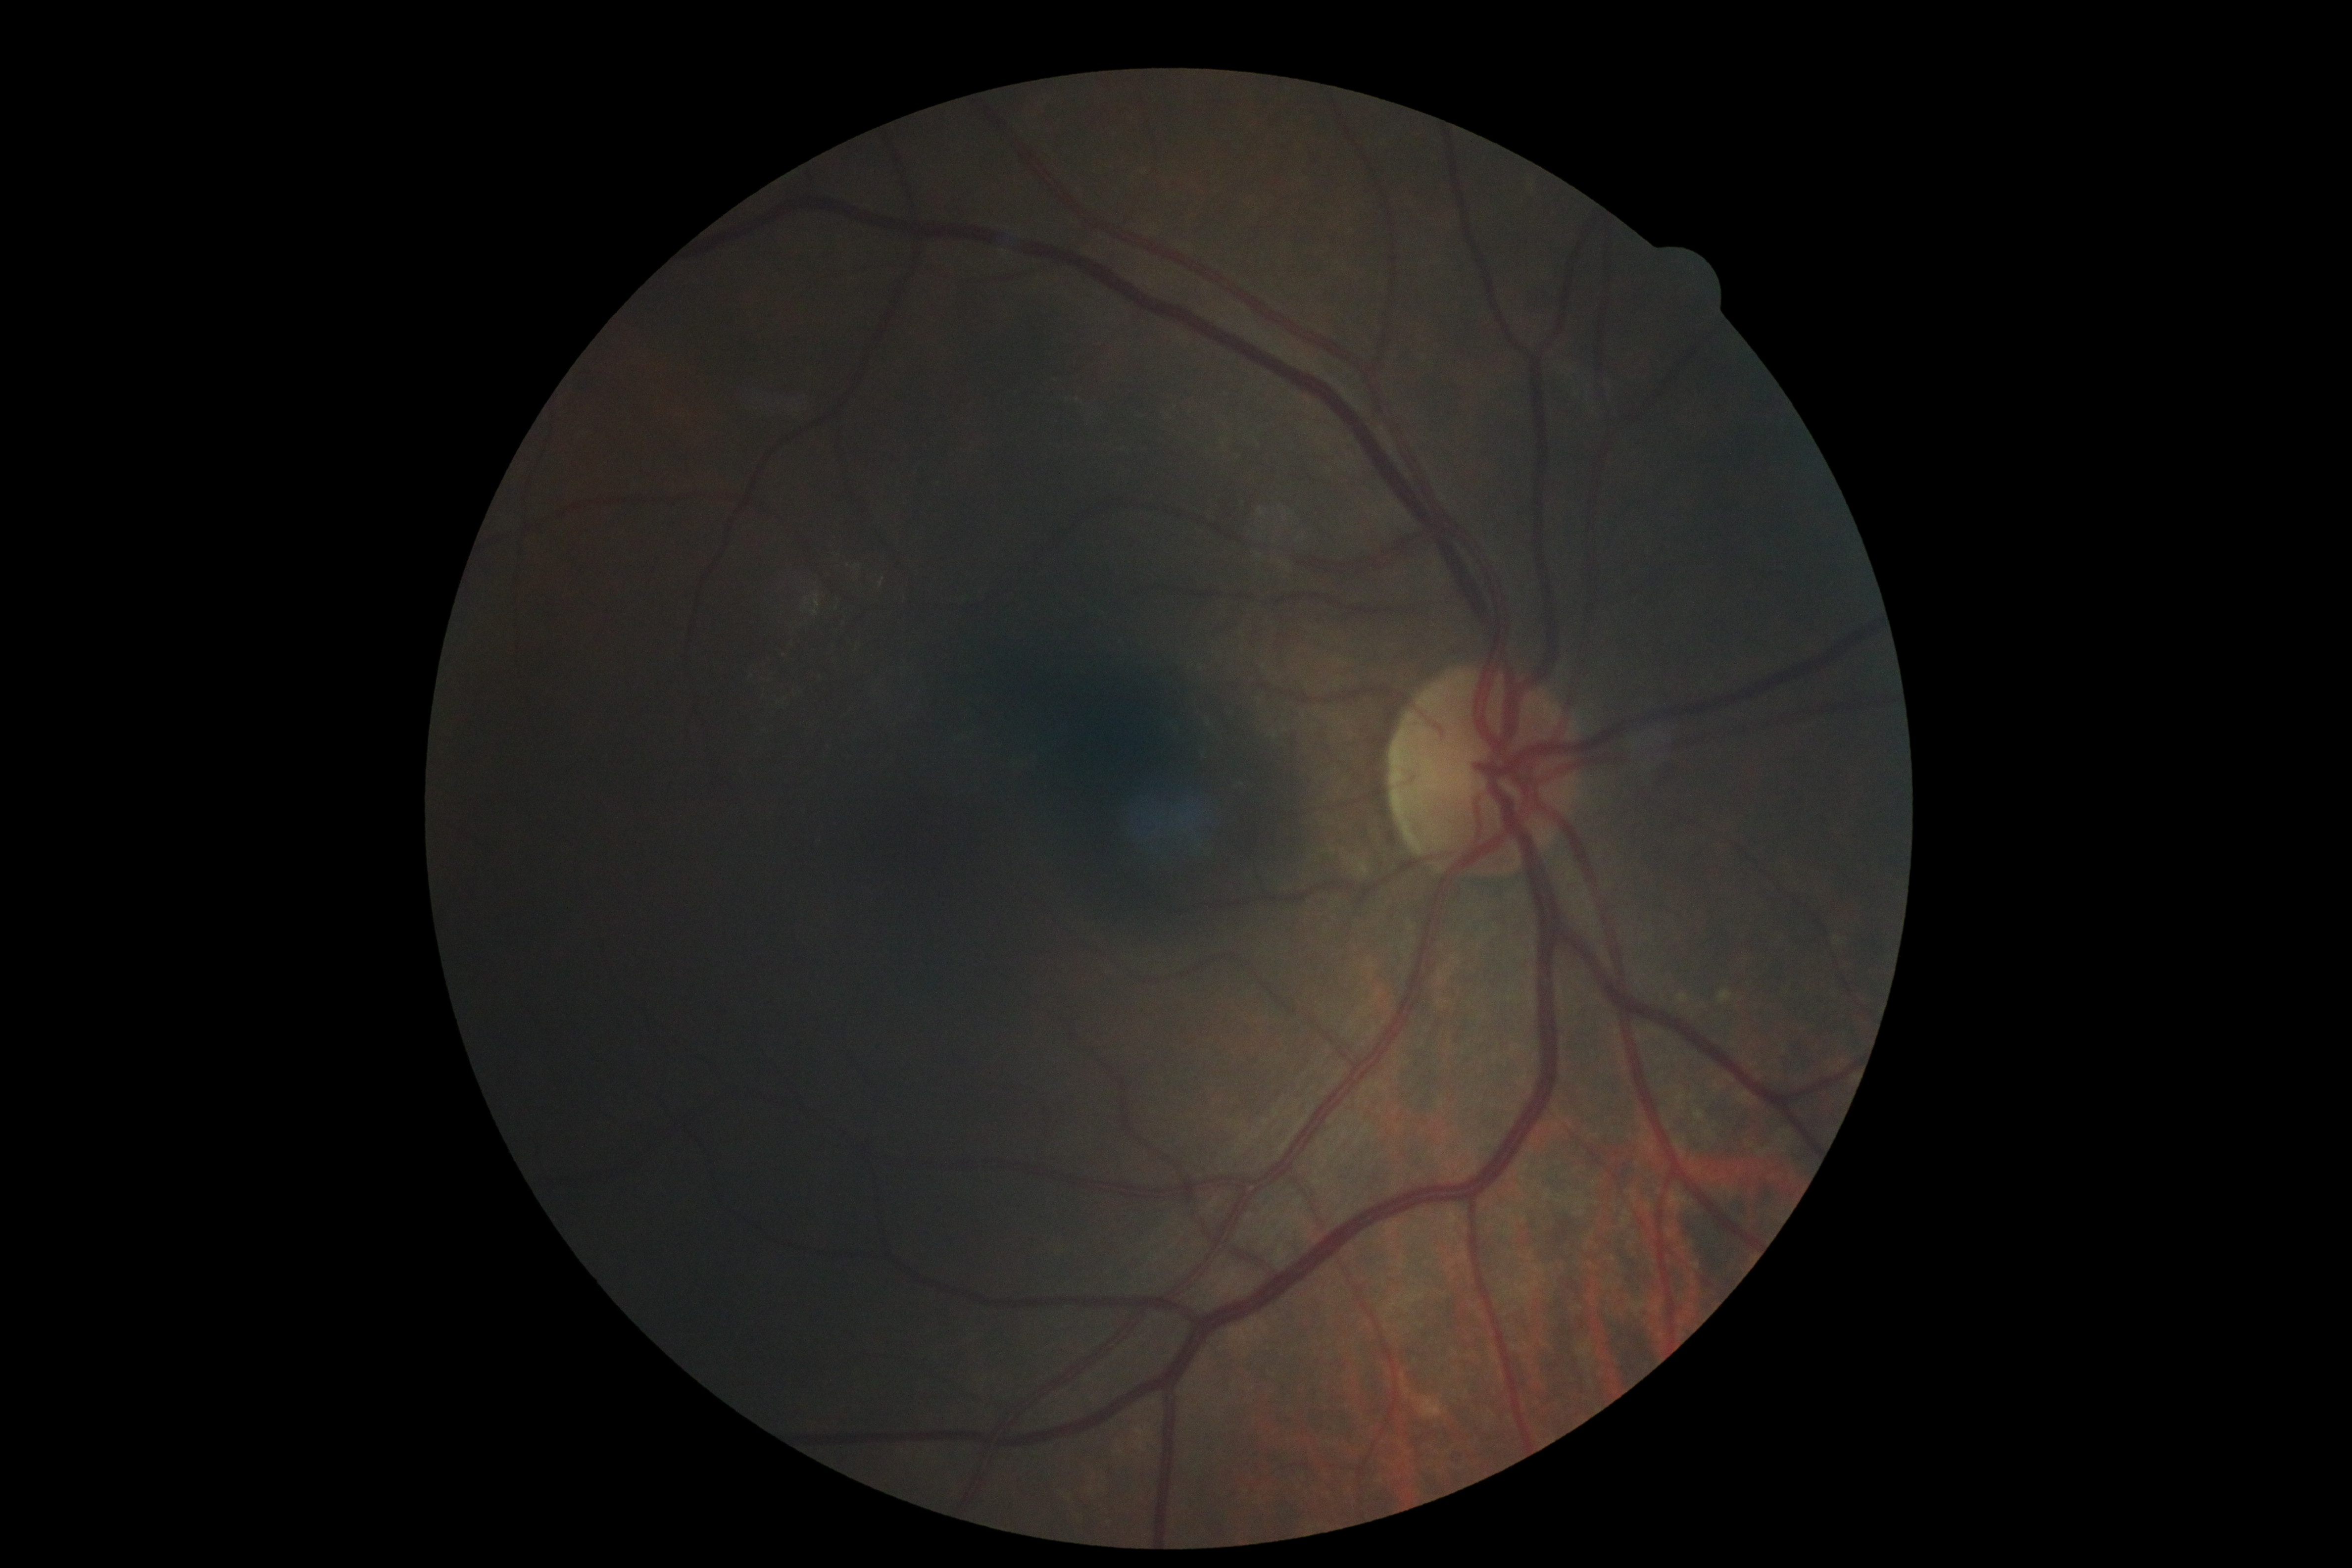

In [34]:
from IPython.display import Image

display(Image('sample/10_left.jpeg', width=400, height=400))
display(Image('sample/10_right.jpeg', width=400, height=400))

at least one picture is very dark

In [37]:
%ls -l

total 34179696
drwxr-xr-x 2 root root        4096 Feb 12  2015 sample/
-rw-r--r-- 1 root root    10905224 May 20 22:33 sample.zip
-rw-r--r-- 1 root root      465317 Feb  6  2015 trainLabels.csv
-rw-r--r-- 1 root root       71069 May 20 22:37 trainLabels.csv.zip
-rw-r--r-- 1 root root 34988445506 May 20 22:42 train.zip


podemos usar sample para validar la data...

ahora vamos a descomprimir, se espera que nos encontremos en el límite de memoria de hdd que provee google.

In [38]:
!unzip train.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train/44261_right.jpeg  
  inflating: train/44262_left.jpeg   
  inflating: train/44262_right.jpeg  
  inflating: train/44263_left.jpeg   
  inflating: train/44263_right.jpeg  
  inflating: train/44264_left.jpeg   
  inflating: train/44264_right.jpeg  
  inflating: train/44265_left.jpeg   
  inflating: train/44265_right.jpeg  
  inflating: train/44267_left.jpeg   
  inflating: train/44267_right.jpeg  
  inflating: train/44268_left.jpeg   
  inflating: train/44268_right.jpeg  
  inflating: train/44275_left.jpeg   
  inflating: train/44275_right.jpeg  
  inflating: train/44278_left.jpeg   
  inflating: train/44278_right.jpeg  
  inflating: train/44280_left.jpeg   
  inflating: train/44280_right.jpeg  
  inflating: train/44281_left.jpeg   
  inflating: train/44281_right.jpeg  
  inflating: train/44282_left.jpeg   
  inflating: train/44282_right.jpeg  
  inflating: train/44284_left.jpeg   
  inflating: train/44284_ri

solo por precaución vamos a borrar el zip de entrenamiento.

In [41]:
!rm train.zip
!ls

sample	sample.zip  train  trainLabels.csv  trainLabels.csv.zip


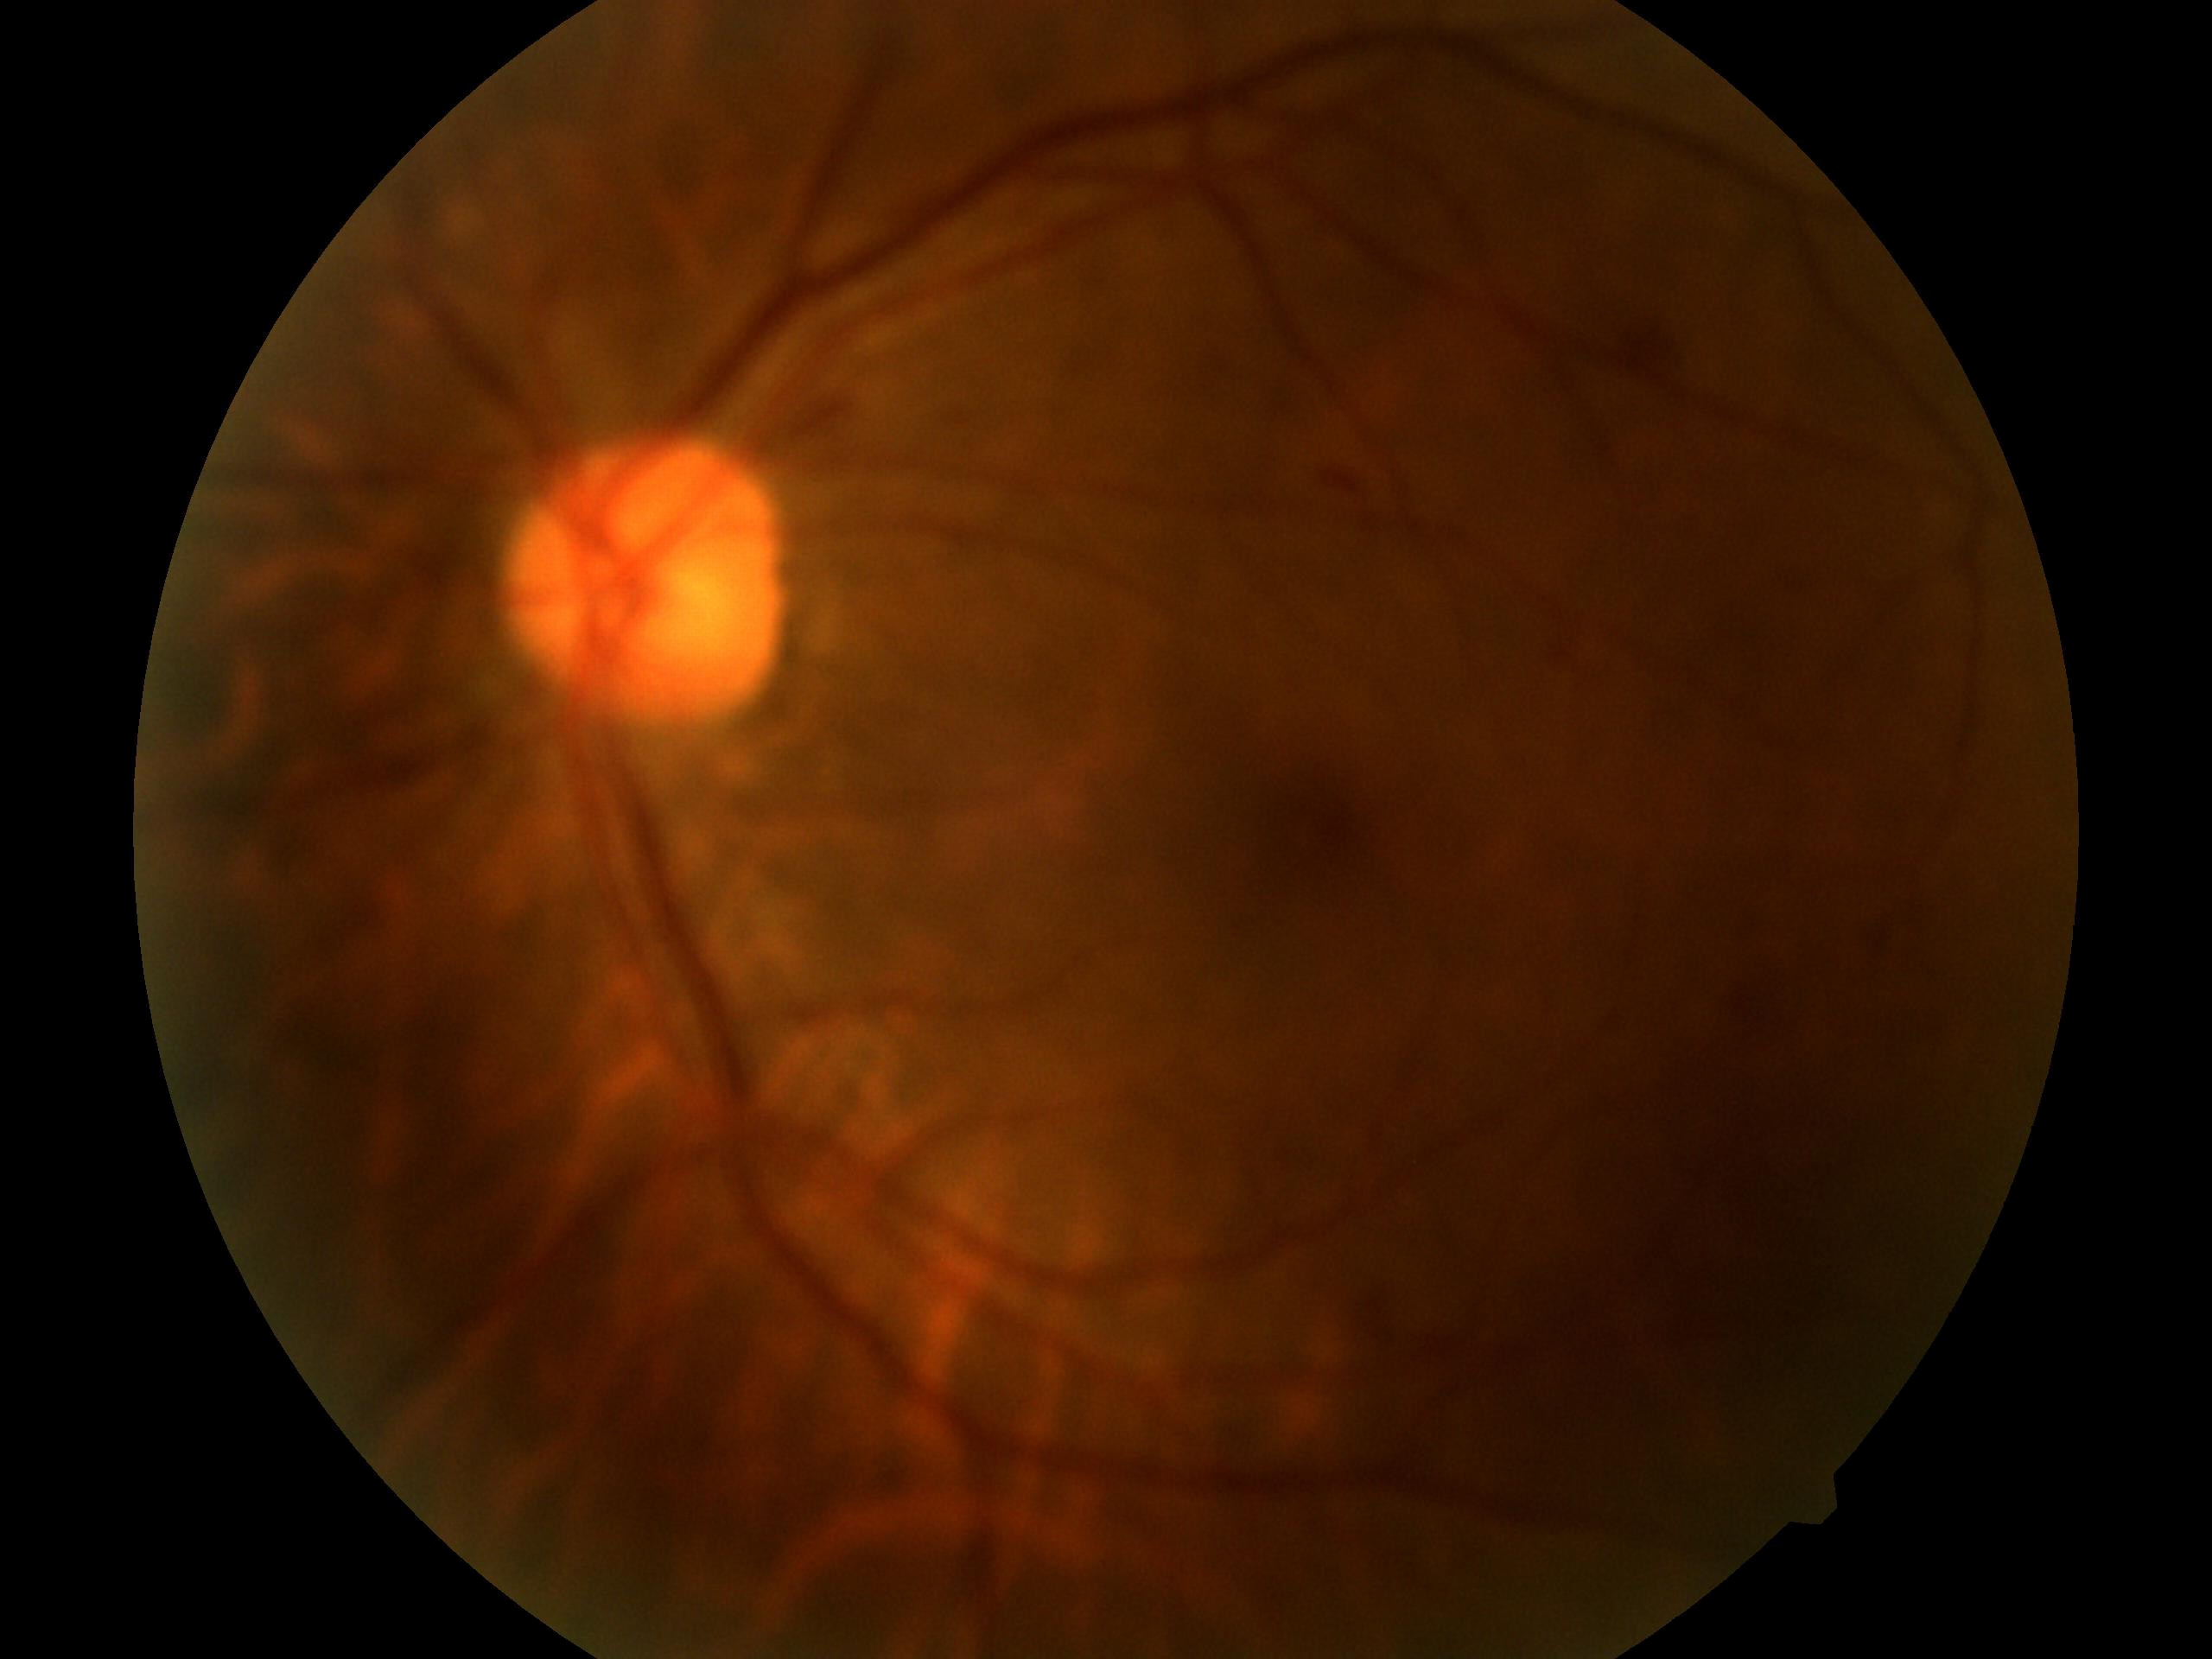

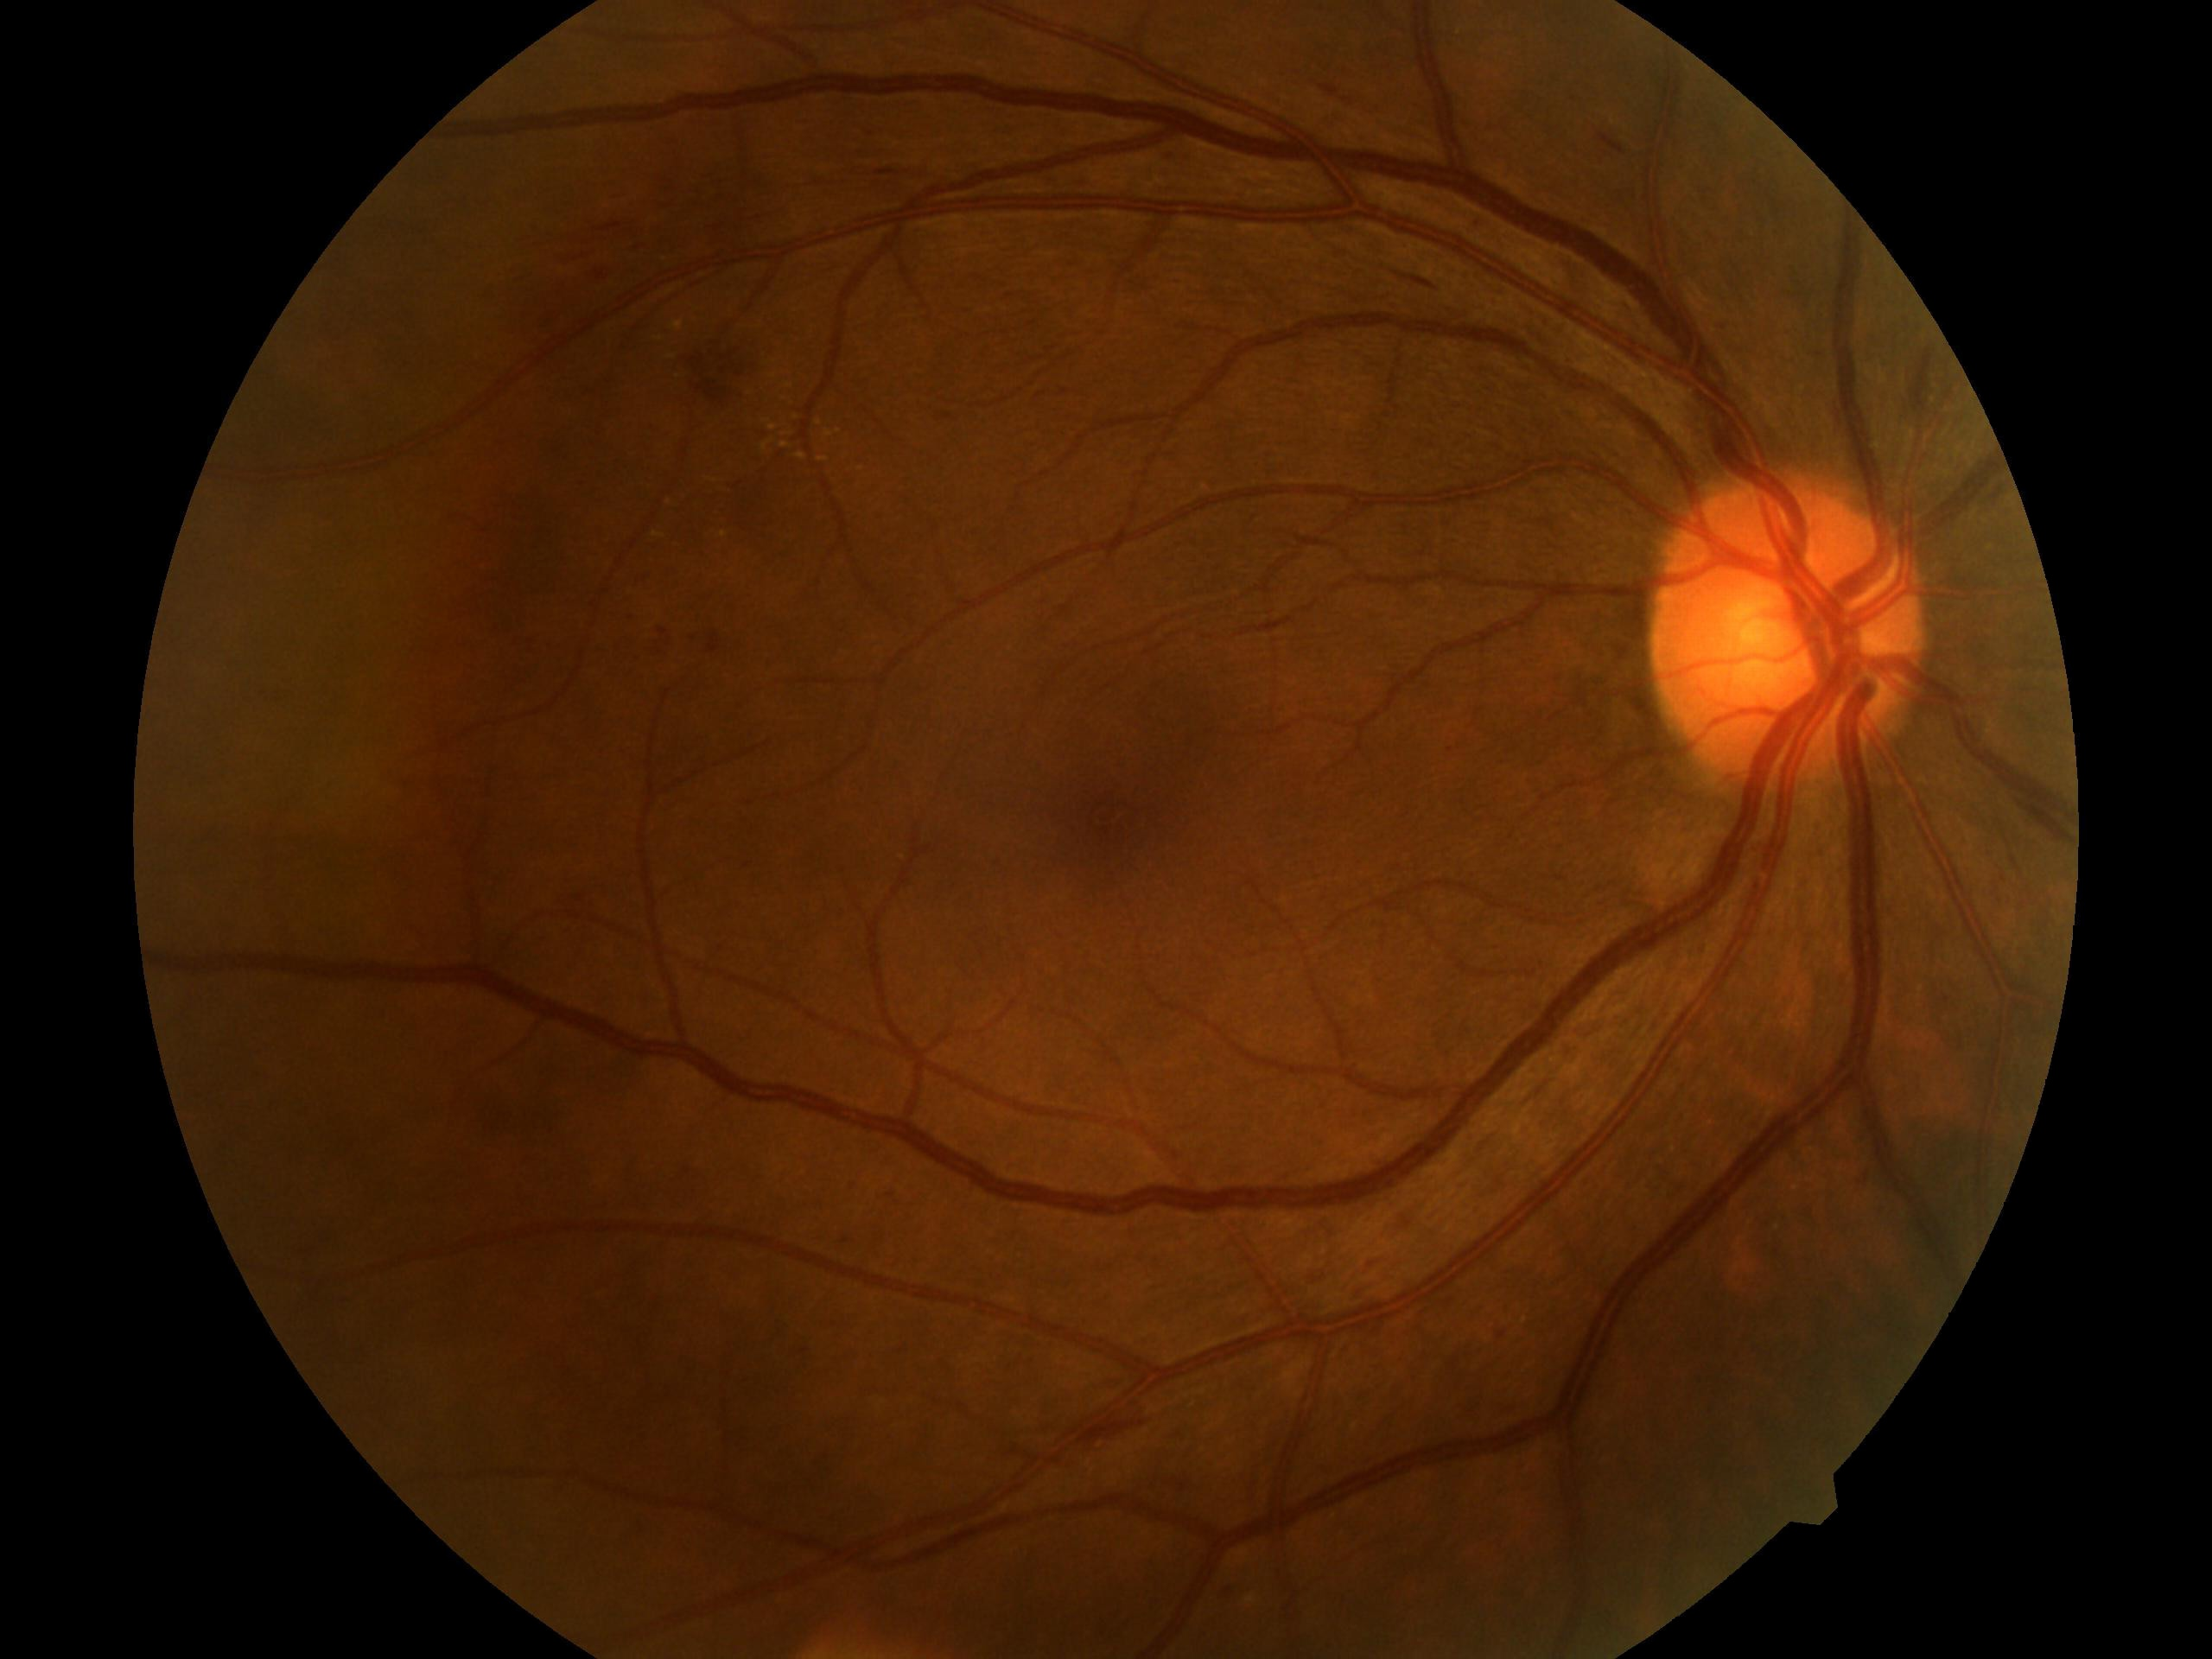

In [43]:
display(Image('train/99_left.jpeg', width=400, height=400))
display(Image('train/99_right.jpeg', width=400, height=400))

vamos a mirar un quick model. primero vamos a generar subcarpetas de categorías con las respectivas imágenes dentro.

In [0]:
###llalalallalalalala trabajando en ello

y el generador de imágenes para alimentar el modelo

In [46]:
!ls

sample	sample.zip  train  trainLabels.csv  trainLabels.csv.zip


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   brightness_range=[0.9,1.0],
                                   fill_mode='nearest', 
                                   horizontal_flip=True, 
                                   validation_split=0.21 #no hacemos una carpeta para alimentar el set de desarrollo
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

#inicalmente usamos un batch pequeño, para no sobre dimensionar el modelo y sobrepasar la memoria
#luego se puede modificar.

train_batch_size=16 
dev_batch_size=16


train_generator = train_datagen.flow_from_directory(
        'train/',
        target_size=(400, 400),
        batch_size=train_batch_size,
        class_mode='categorical',        
        )

dev_generator = train_datagen.flow_from_directory(
        'train/', 
        target_size=(400, 400),
        batch_size=dev_batch_size,
        class_mode='categorical',
        subset='validation' #tomamos el validation_split=21 (21% de los datos) desde la carpeta de entrenamiento
        )

test_generator = test_datagen.flow_from_directory(
        'sample/',
        target_size=(400, 400),
        class_mode='categorical',
        batch_size=1
        )



